In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# load dataset
clamp_train = pd.read_csv("database/clamp/clamp_train_80.csv")
clamp_test = pd.read_csv("database/clamp/clamp_test_20.csv")

clamp = clamp_train.append(clamp_test)

<br><br>

Make train and test dataset.

In [ ]:
# make train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clamp.drop(["label"], axis=1), clamp["label"], test_size=0.3, random_state=42)

X_train["label"] = y_train
X_test["label"] = y_test

X_train.to_csv("database/clamp_train_70.csv", index=False)
X_test.to_csv("database/clamp_test_30.csv", index=False)

print(X_train.info())
print(X_test.info())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(clamp.drop(["label"], axis=1), clamp["label"], test_size=0.2, random_state=42)

X_train["label"] = y_train
X_test["label"] = y_test

X_train.to_csv("database/clamp_train_80.csv", index=False)
X_test.to_csv("database/clamp_test_20.csv", index=False)

print(X_train.info())
print(X_test.info())

<br><br>

Make folds.

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state=42, shuffle=True)
kf.get_n_splits(clamp)
print(kf)

In [3]:
train_folds = []
test_folds = []

for train_index, test_index in kf.split(clamp):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(len(train_index))
    train_folds.append(clamp.iloc[train_index])
    test_folds.append(clamp.iloc[test_index])

In [11]:
train_folds[0].to_csv('database/clamp_train_fold1.csv', index=False)
train_folds[1].to_csv('database/clamp_train_fold2.csv', index=False)
train_folds[2].to_csv('database/clamp_train_fold3.csv', index=False)

test_folds[0].to_csv('database/clamp_test_fold1.csv', index=False)
test_folds[1].to_csv('database/clamp_test_fold2.csv', index=False)
test_folds[2].to_csv('database/clamp_test_fold3.csv', index=False)

<br><br><br><br>

## data analysis

In [3]:
print(clamp.shape)
print(clamp_train.shape)
print(clamp_test.shape)

(5210, 70)
(4168, 70)
(1042, 70)


In [4]:
clamp.describe()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,numberofsections,creationyear,fh_char0,fh_char1,...,sus_sections,non_sus_sections,packer,packer_type,e_text,e_data,filesize,e_file,fileinfo,label
count,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.0,...,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5.210000e+03,5210.000000,5210.000000,5210.000000
mean,152.658733,10.633589,8.903263,65137.618234,202.530902,222.833013,4.662956,0.990403,0.362764,1.0,...,1.360845,3.302111,0.156430,1.137428,4.939586,2.523549,7.875718e+05,6.364756,0.544146,0.522457
std,616.499070,392.745064,251.685103,5005.606042,968.625098,48.591497,1.922882,0.097502,0.480844,0.0,...,1.623972,1.146956,0.363297,3.675752,2.521787,2.685909,5.293440e+06,1.119881,0.498095,0.499543
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536000e+03,0.939626,0.000000,0.000000
25%,144.000000,3.000000,4.000000,65535.000000,184.000000,208.000000,4.000000,1.000000,0.000000,1.0,...,1.000000,3.000000,0.000000,0.000000,3.886006,0.000000,6.144000e+04,5.695785,0.000000,0.000000
50%,144.000000,3.000000,4.000000,65535.000000,184.000000,232.000000,5.000000,1.000000,0.000000,1.0,...,1.000000,4.000000,0.000000,0.000000,6.148211,1.555973,1.218560e+05,6.390618,1.000000,1.000000
75%,144.000000,3.000000,4.000000,65535.000000,184.000000,248.000000,5.000000,1.000000,1.000000,1.0,...,2.000000,4.000000,0.000000,0.000000,6.507072,4.685836,3.055480e+05,7.314531,1.000000,1.000000
max,37008.000000,20050.000000,12851.000000,65535.000000,65534.000000,648.000000,34.000000,1.000000,1.000000,1.0,...,31.000000,8.000000,1.000000,39.000000,7.999859,7.999620,1.657081e+08,7.999997,1.000000,1.000000


In [39]:
benign = clamp.loc[ clamp['label'] == 0, : ]
malware = clamp.loc[ clamp['label'] == 1, : ]

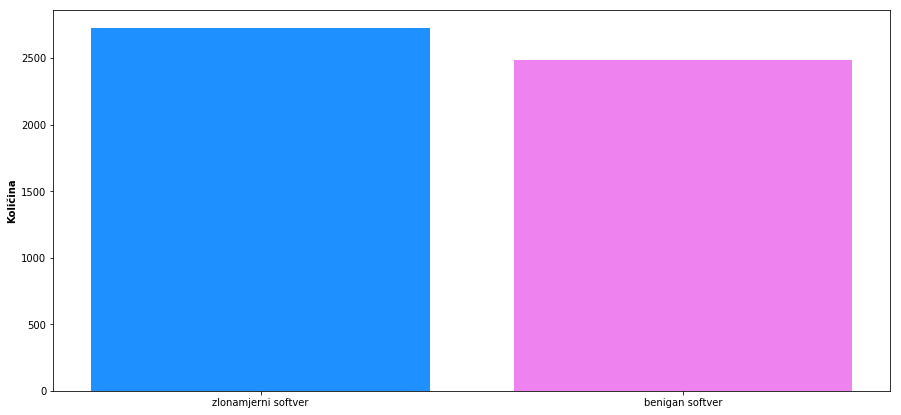

In [27]:
number_of_malicious = sum(clamp["label"])
number_of_benign = clamp.shape[0] - number_of_malicious

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(["zlonamjerni softver", "benigan softver"], [number_of_malicious, number_of_benign], color = ['dodgerblue', 'violet'])
plt.xticks(rotation='horizontal')
plt.ylabel('Količina', fontweight='bold')

plt.show()

In [35]:
print(abs(clamp.corrwith(clamp['label']).dropna()).sort_values()) 

minorimageversion    0.005610
majorimageversion    0.011587
checksum             0.012051
oh_dllchar3          0.013247
fh_char4             0.014492
                       ...   
fileinfo             0.513975
oh_dllchar0          0.518928
oh_dllchar2          0.542824
fh_char12            0.608070
label                1.000000
Length: 62, dtype: float64


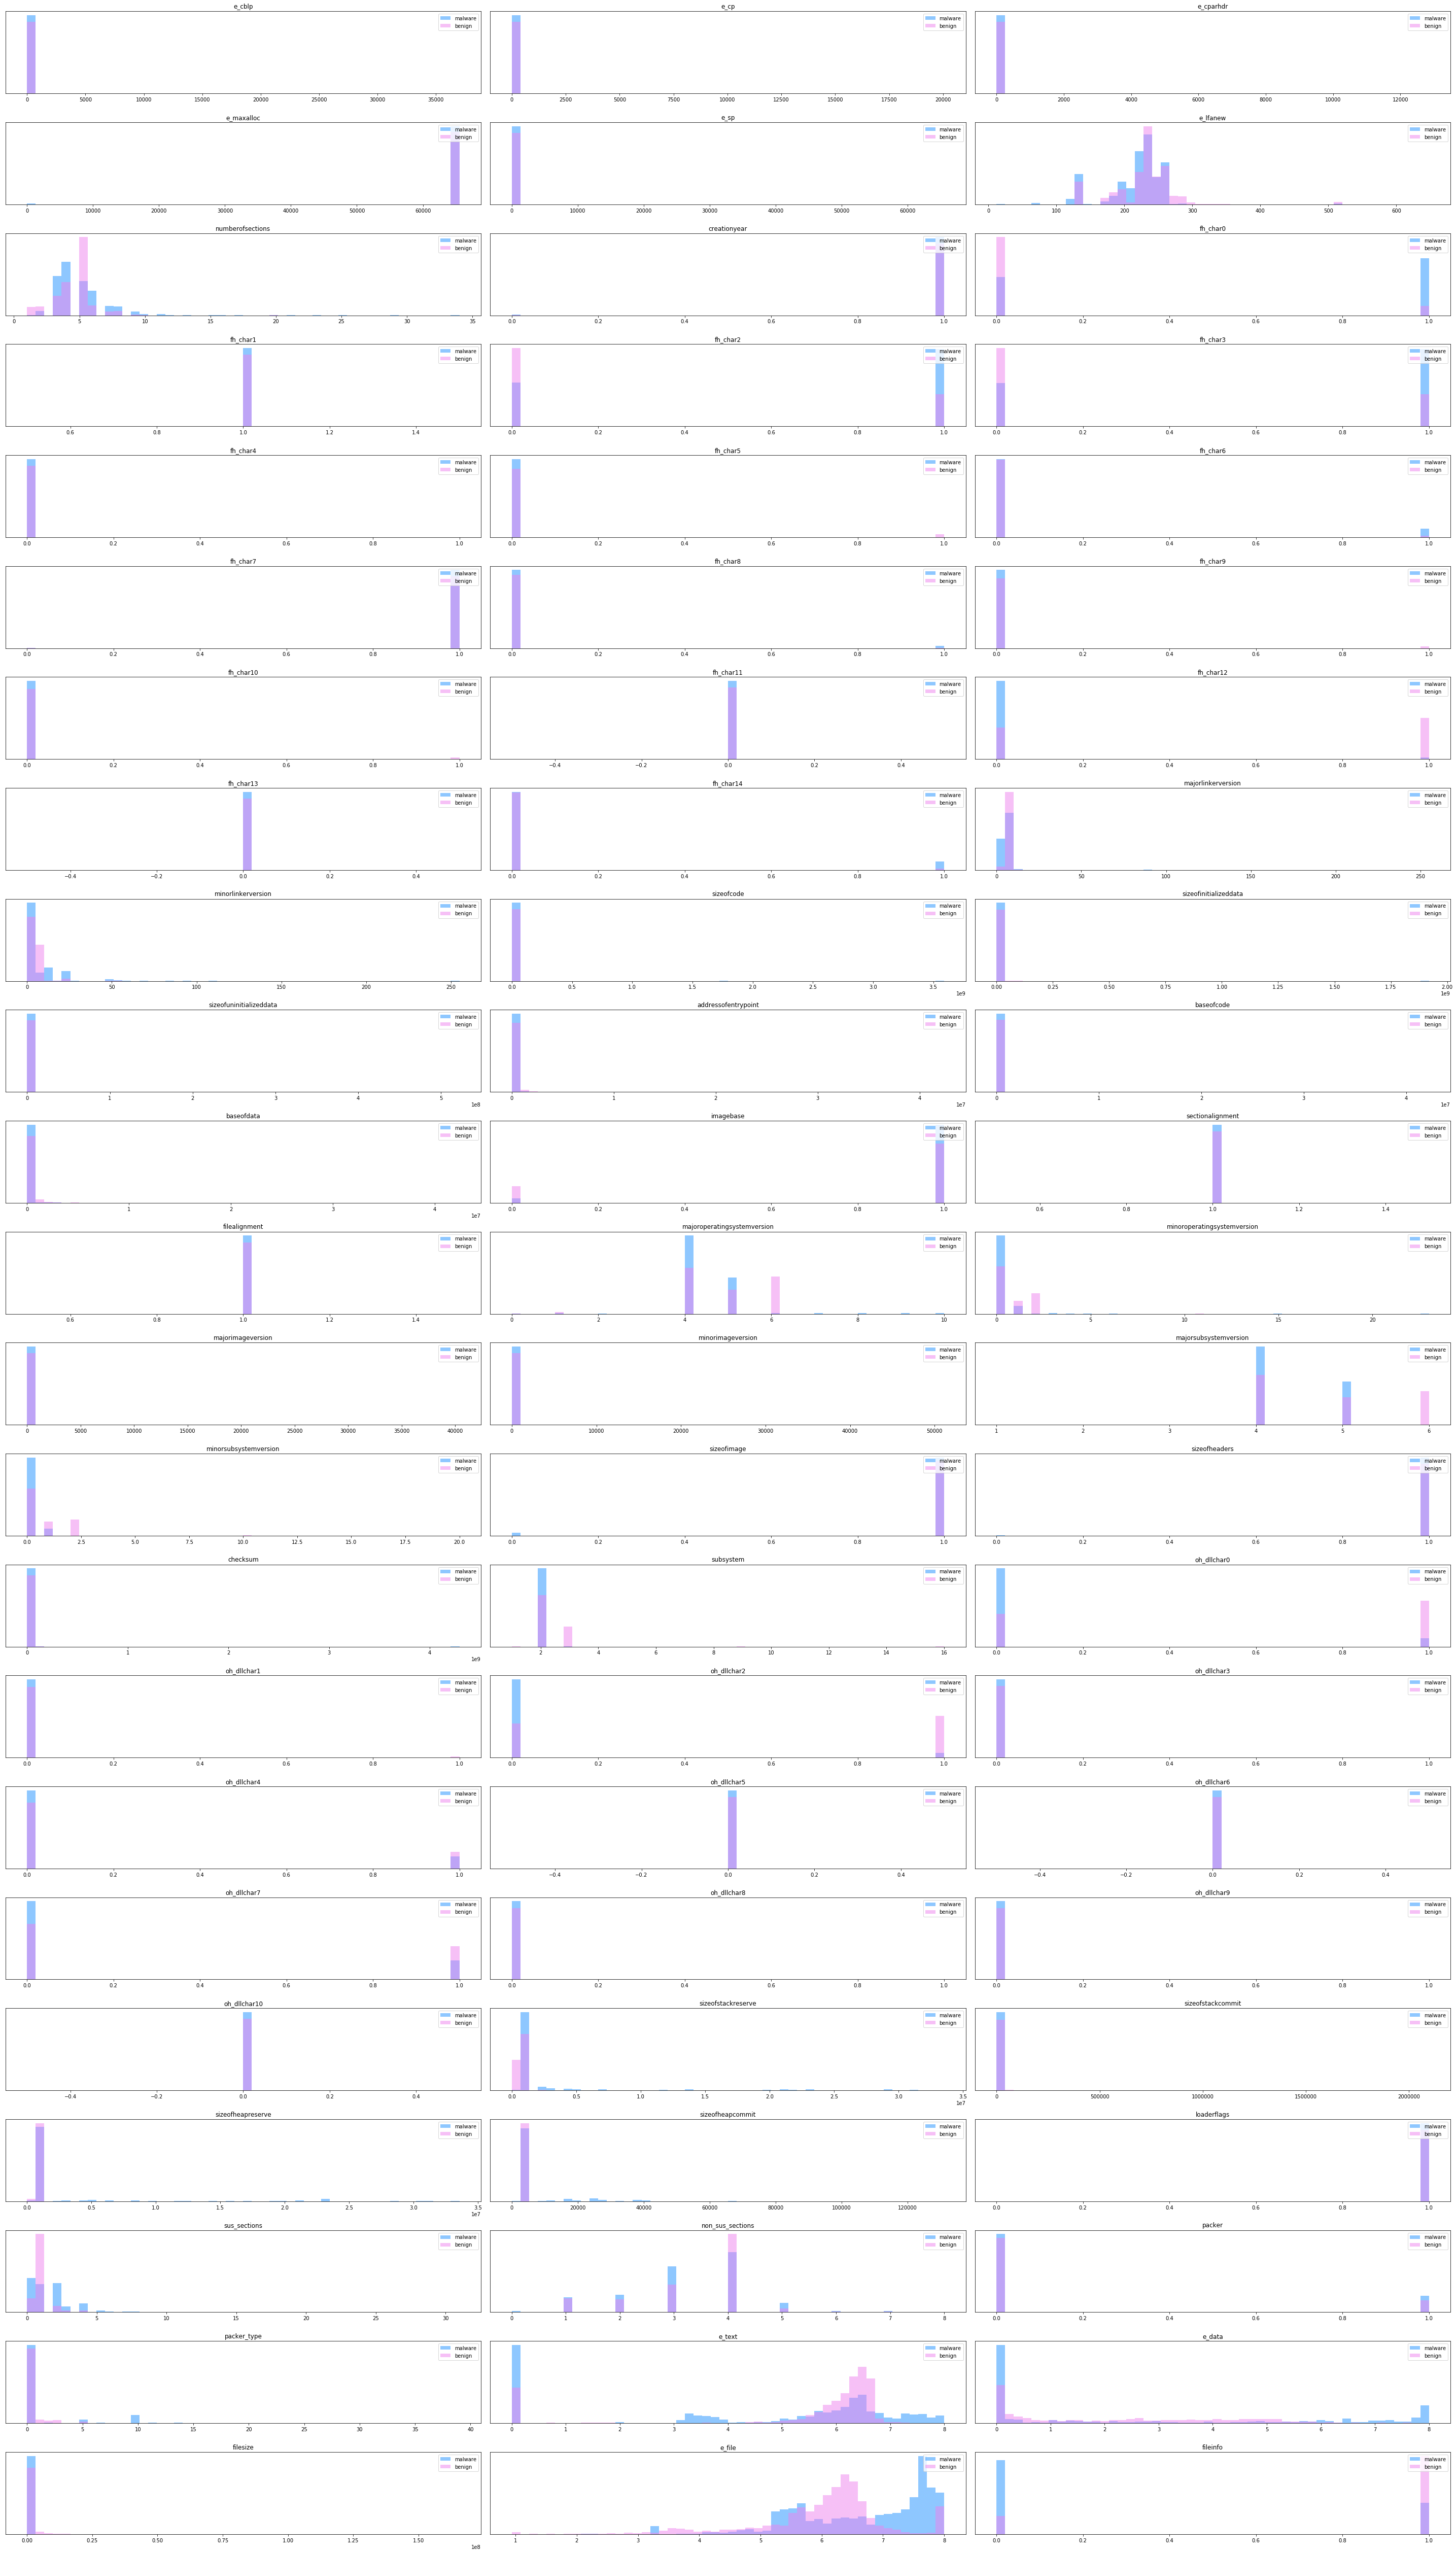

In [44]:
fig, axes = plt.subplots(35, 2, figsize=(40, 70))
ax = axes.ravel() # axes are 2-dimensional so we unfold them
for i in range(69):
    _, bins = np.histogram(clamp.iloc[:,i], bins=50)
    ax[i].hist(malware.iloc[:,i], bins=bins, color='dodgerblue', alpha=.5, label='malware')
    ax[i].hist(benign.iloc[:,i], bins=bins, color='violet', alpha=.5, label='benign')
    ax[i].set_title(clamp.columns.values[i])
    ax[i].set_yticks(()) # remove ticks on y-axis
    ax[i].legend(loc='upper right')
fig.tight_layout()

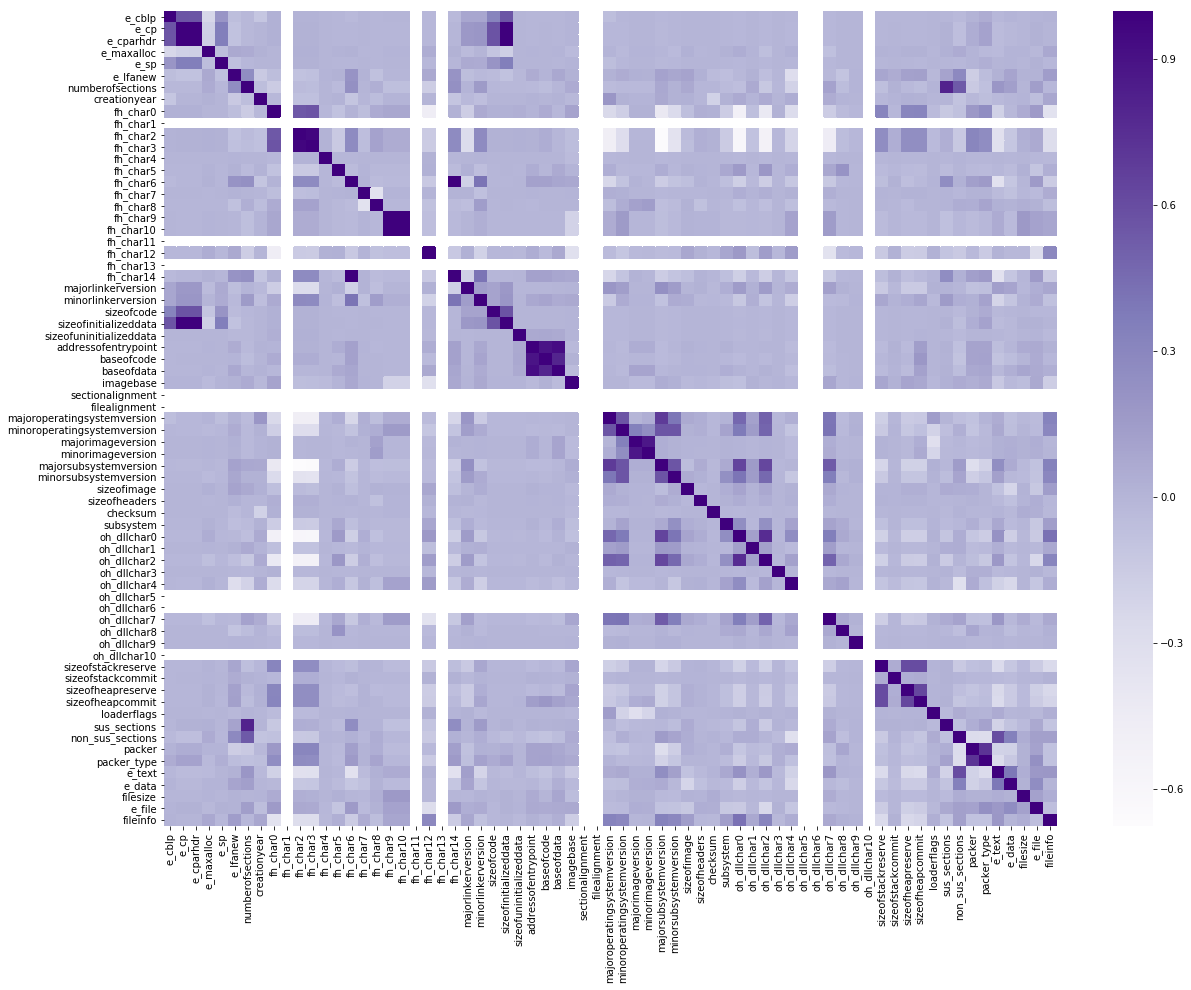

In [52]:
best_features_in_category_dataframe = pd.DataFrame()
index = 0

for features in clamp.columns:
    if (features == "label"):
        continue
    best_features_in_category_dataframe.insert(index, features, clamp[features])
    index = index + 1

plt.subplots(figsize=(20,15))
sn.heatmap(best_features_in_category_dataframe.corr(), cmap='Purples')

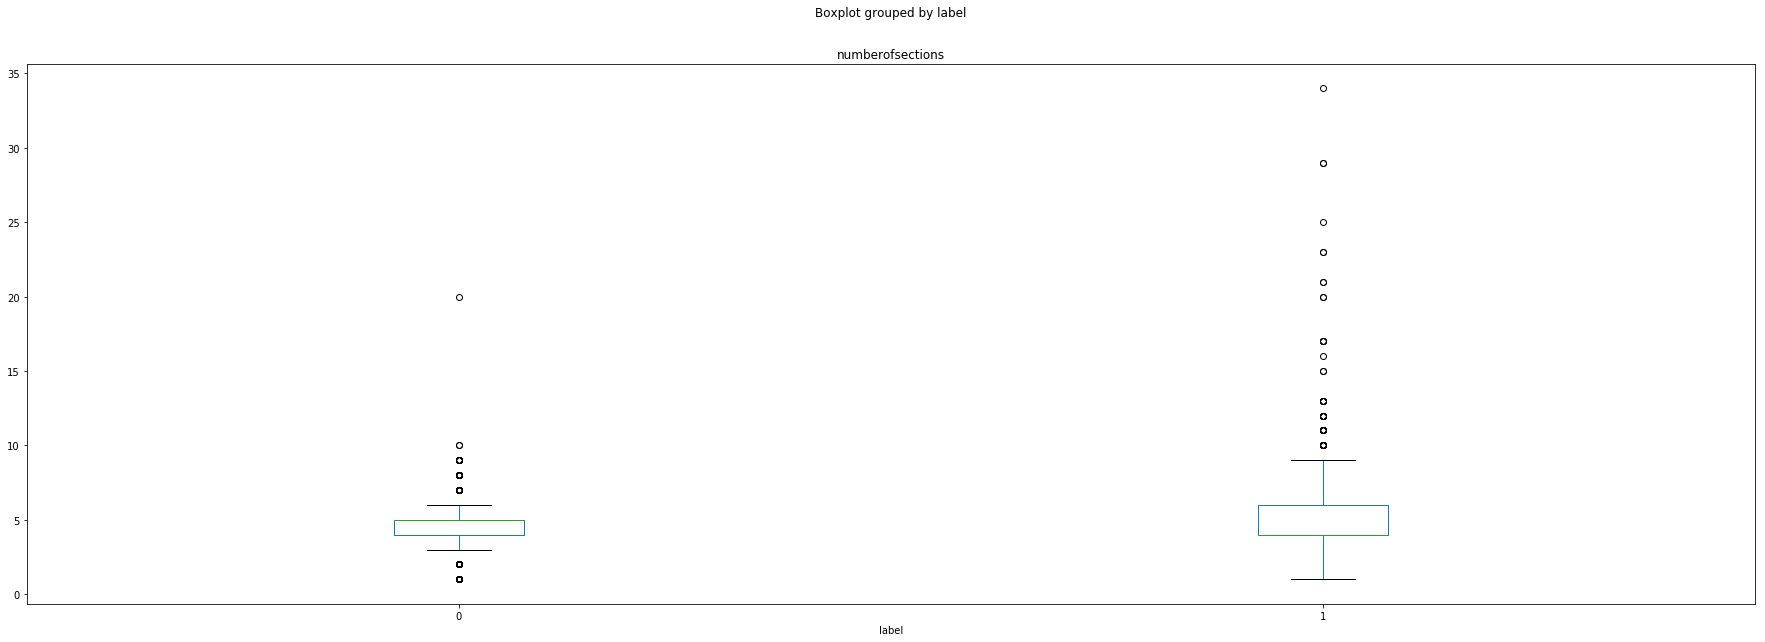

In [59]:
col = clamp.columns.get_loc('numberofsections')

clamp.boxplot(column=[clamp.columns.values[col]], 
                 by='label',
                 grid=False,
                 layout=(1,1),
                 figsize=(30,10))